In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
def crear_tabla(variable_agrupamiento):

    df_no_cumple = df[df.Cumplimiento == 'No Cumple']
    df_no_cumple_group_dia = pd.DataFrame(
        df_no_cumple.groupby(by=variable_agrupamiento).Cumplimiento.count()
    ).sort_values(by='Cumplimiento', ascending=False)

    df_no_cumple_group_dia['Total_incumplimientos'] = df_no_cumple.Cumplimiento.count(
    )
    df_no_cumple_group_dia['Porcentaje_incumplimiento'] = (
        df_no_cumple_group_dia.Cumplimiento /
        df_no_cumple_group_dia.Total_incumplimientos
    ) * 100

    # Devuelve la tabla
    return round(df_no_cumple_group_dia[['Porcentaje_incumplimiento']].sort_values(
        by='Porcentaje_incumplimiento',
        ascending=False
    )).head(10)


In [30]:
df = pd.read_excel('Datos/información.xlsx', sheet_name='info')


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_id          5410 non-null   int64 
 1   Local           5410 non-null   int64 
 2   job_state       5410 non-null   object
 3   Comuna          5404 non-null   object
 4   fleet_name      4993 non-null   object
 5   Fecha_Creacion  5410 non-null   object
 6   Fecha_Asignado  4575 non-null   object
 7   Fecha_Exito     4973 non-null   object
 8   Conductor       4993 non-null   object
dtypes: int64(2), object(7)
memory usage: 380.5+ KB


In [32]:
df["Conductor"] = df["Conductor"].fillna('Sin Nombre')


In [33]:
df['Fecha_Creacion'] = pd.to_datetime(df['Fecha_Creacion'])
df['Fecha_Exito'] = pd.to_datetime(df['Fecha_Exito'])


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   job_id          5410 non-null   int64         
 1   Local           5410 non-null   int64         
 2   job_state       5410 non-null   object        
 3   Comuna          5404 non-null   object        
 4   fleet_name      4993 non-null   object        
 5   Fecha_Creacion  5410 non-null   datetime64[ns]
 6   Fecha_Asignado  4575 non-null   object        
 7   Fecha_Exito     4973 non-null   datetime64[ns]
 8   Conductor       5410 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 380.5+ KB


In [35]:
df['Fecha_Creacion_Día'] = df['Fecha_Creacion'].dt.day
df['Fecha_Creacion_Hora'] = df['Fecha_Creacion'].dt.hour
df['Fecha_Exito_Día'] = df['Fecha_Exito'].dt.day


In [36]:
lista = []


for x, y, z in zip(df.Fecha_Creacion_Día, df.Fecha_Creacion_Hora, df.Fecha_Exito_Día):
    if y < 11 and z == x:
        lista.append("Cumple")
    elif y >= 11 and z == x:
        lista.append("Cumple")
    elif y >= 11 and z == x + 1:
        lista.append("Cumple")
    else:
        lista.append("No Cumple")


df['Cumplimiento'] = pd.Series(lista)


In [37]:
df_agrupado_dia = df.groupby(by='Fecha_Creacion_Día').Cumplimiento.count()


In [38]:
df_cumple = df[df.Cumplimiento == 'Cumple']
df_cumple_agrupado_dia = df_cumple.groupby(
    by='Fecha_Creacion_Día'
).Cumplimiento.count()


In [39]:
cumplimiento_dia = (df_cumple_agrupado_dia / df_agrupado_dia) * 100


### La siguiente tabla muestra el cumplimiento (en porcentaje) de los tiempos de entrega por día, durante octubre de 2021.

In [40]:
porcentaje_cumplimiento_dia = pd.DataFrame(round(cumplimiento_dia.fillna(0))).sort_values(
    by='Cumplimiento', ascending=False
)

porcentaje_cumplimiento_dia


,Cumplimiento
Fecha_Creacion_Día,
26,92.0
25,89.0
22,88.0
21,85.0
23,80.0
24,76.0
27,52.0
28,0.0


c:\Users\arnif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


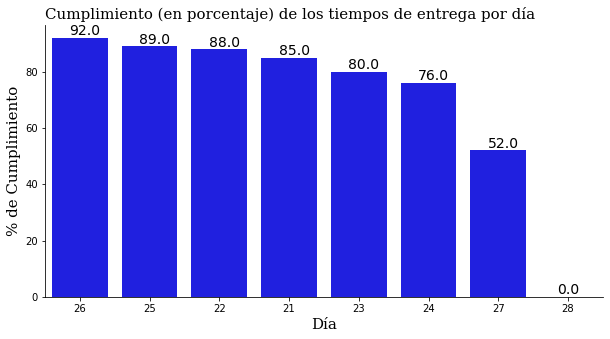

In [41]:
x = porcentaje_cumplimiento_dia.index
y = porcentaje_cumplimiento_dia.Cumplimiento

plt.figure(figsize=(10, 5))
# NOTA: tanto x como y siempre van de menor a mayor evidentemente
sns.barplot(x, y, order=x, color="blue")

for i, g in enumerate(y):
    plt.text(i-0.15, g+1, f'{g}', color='black', fontsize=14)


font1 = {'family': 'serif', 'color': 'black', 'size': 15}

plt.title(
    'Cumplimiento (en porcentaje) de los tiempos de entrega por día',
    fontdict=font1,
    loc='left'
)

plt.xlabel('Día', fontdict=font1)
plt.ylabel('% de Cumplimiento', fontdict=font1)
# Quita el margen superior
sns.despine()


### Se puede ver que los mayores porcentajes de cumplimiento de los tiempos de entrega ocurrieron los días 26, 25 y 22 de octubre de 2021. En sentido contrario, los dos días donde el cumplimiento fue más bajo fueron el 27 y 28, en este último, se logró un cero por ciento de cumplimiento de los tiempos de entrega.

### La tabla de abajo expone los incumplimientos de tiempo de entrega asociado a repartidores.

In [42]:
crear_tabla('Conductor')


,Porcentaje_incumplimiento
Conductor,
Sin Nombre,43.0
repartidor76,3.0
repartidor88,3.0
repartidor86,3.0
repartidor60,2.0
repartidor80,2.0
repartidor79,2.0
repartidor20,2.0
repartidor78,2.0


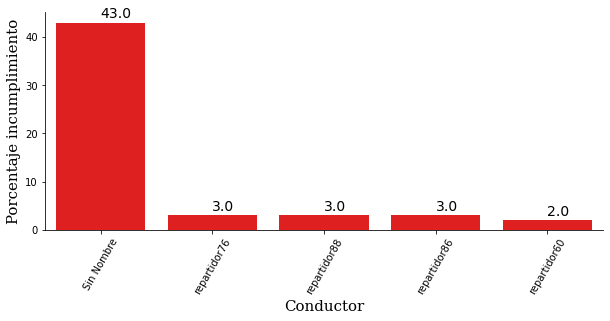

In [43]:
x_nombre = crear_tabla('Conductor').head().index
y_incumplimiento = crear_tabla('Conductor').Porcentaje_incumplimiento.head()

plt.figure(figsize=(10, 4))
# NOTA: tanto x como y siempre van de menor a mayor evidentemente
sns.barplot(x=x_nombre, y=y_incumplimiento, order=x_nombre, color="red")
plt.xticks(rotation=60)

for i, g in enumerate(y_incumplimiento):
    plt.text(i, g+1, f'{g}', color='black', fontsize=14)

plt.xlabel('Conductor', fontdict=font1)
plt.ylabel('Porcentaje incumplimiento', fontdict=font1)
# Quita el margen superior
sns.despine()


### Se observa que un 43% de las ocurrencias de casos fallidos de cumplimiento de los tiempos de entrega no tienen el nombre del repartidor encargado del pedido. 



In [44]:
crear_tabla('Local')


,Porcentaje_incumplimiento
Local,
2,21.0
46,17.0
1129,14.0
1119,12.0
1121,9.0
1123,8.0
1114,4.0
1044,2.0
1120,2.0


### Por otra parte, los locales 2, 46, 1129, 1119 y 1121 se asocian a un 73% de los casos fallidos de cumplimiento de los tiempos de entrega.


In [45]:
crear_tabla('Comuna')


,Porcentaje_incumplimiento
Comuna,
Santiago,7.0
Maipú,7.0
La Florida,7.0
Puente Alto,6.0
Ñuñoa,5.0
Las Condes,5.0
Providencia,4.0
San Bernardo,4.0
Pudahuel,3.0


### Finalmente las comunas de Santiago, Maipú, La Florida, Puente Alto, Ñuñoa y Las Condes se vinculan a un 37% de los incumplimientos de los tiempos de entrega.
